# The purpose of this project is if to see I can build a model to predict the outcome of a English Premier League game. I found the dataset from Kaggle that is comprised of many metrics for Premier League games dating back to 1993 to 2021. 

### I watch a decent amount of soccer so the goal for this is to use my knowledge of data engineering and data science to build a model from the dataset that has a high precision of predicting the outcome of the soccer game. As there are many factors that can determine the outcome of a soccer game, I am going to try and see if there are a handful of features that will best determine the outcome of the game. 

| Column Name | Column Description |
| --- | --- |
| Column | Description |
| Season | Match Season |
| DateTime | Match Date and Time (yyyy-mm-dd hh:mm:ss) |
| HomeTeam | Home Team |
| AwayTeam | Away Team |
| FTHG | Full Time Home Team Goals |
| FTAG | Full Time Away Team Goals |
| FTR | Full Time Result (H=Home Win, D=Draw, A=Away Win) |
| HTHG | Half Time Home Team Goals |
| HTAG | Half Time Away Team Goals |
| HTR | Half Time Result (H=Home Win, D=Draw, A=Away Win) |
| Referee | Match Referee |
| HS | Home Team Shots |
| AS | Away Team Shots |
| HST | Home Team Shots on Target |
| AST | Away Team Shots on Target |
| HC | 	Home Team Corners |
| AC | 	Away Team Corners |
| HF | 	Home Team Fouls Committed |
| AF | 	Away Team Fouls Committed |
| HY | 	Home Team Yellow Cards |
| AY | 	Away Team Yellow Cards |
| HR | 	Home Team Red Cards |
| AR | 	Away Team Red Cards |

In [125]:
# Import the initial dataset and begin data cleaning: 
import pandas as pd
import csv
#for some reasong there was an error "UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte". To fix --> use ' encoding= 'unicode_escape' '
data = pd.read_csv('results.csv', encoding= 'unicode_escape') 
init_prem_df = pd.DataFrame(data)

In [126]:
# Print dataframe to make sure that it correctly imported
init_prem_df

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11070,2021-22,2022-03-07T20:00:00Z,Tottenham,Everton,5,0,H,3.0,0.0,H,...,7.0,0.0,5.0,2.0,15.0,10.0,2.0,0.0,0.0,0.0
11071,2021-22,2022-03-10T19:30:00Z,Norwich,Chelsea,1,3,A,0.0,2.0,A,...,3.0,7.0,3.0,8.0,8.0,15.0,0.0,2.0,0.0,0.0
11072,2021-22,2022-03-10T19:30:00Z,Southampton,Newcastle,1,2,A,1.0,1.0,D,...,5.0,4.0,12.0,5.0,6.0,7.0,1.0,1.0,0.0,0.0
11073,2021-22,2022-03-10T19:30:00Z,Wolves,Watford,4,0,H,2.0,0.0,H,...,5.0,0.0,5.0,2.0,11.0,10.0,2.0,2.0,0.0,0.0


In [127]:
# Check the amount of NaN values in the dataframe: 
init_prem_df.isna().sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

In [128]:
# delete rows that have NaN values and observe the new dataframe
init_prem_df = init_prem_df.dropna()
#reset the index
init_prem_df = init_prem_df.reset_index(drop=True)
init_prem_df

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,2021-22,2022-03-07T20:00:00Z,Tottenham,Everton,5,0,H,3.0,0.0,H,...,7.0,0.0,5.0,2.0,15.0,10.0,2.0,0.0,0.0,0.0
8247,2021-22,2022-03-10T19:30:00Z,Norwich,Chelsea,1,3,A,0.0,2.0,A,...,3.0,7.0,3.0,8.0,8.0,15.0,0.0,2.0,0.0,0.0
8248,2021-22,2022-03-10T19:30:00Z,Southampton,Newcastle,1,2,A,1.0,1.0,D,...,5.0,4.0,12.0,5.0,6.0,7.0,1.0,1.0,0.0,0.0
8249,2021-22,2022-03-10T19:30:00Z,Wolves,Watford,4,0,H,2.0,0.0,H,...,5.0,0.0,5.0,2.0,11.0,10.0,2.0,2.0,0.0,0.0


### Now that we have the NaN row out, we can start to rearrange the data into a table that we want. 
### --> Notice that the data now starts in the 2000-01 year

In [129]:
# The first thing we want to do is alter the DateTime column to just have the month value because we already know the year
month = []
for i in init_prem_df['DateTime']:
    month.append(i[6:7])

init_prem_df['DateTime'] = month
init_prem_df.rename(columns={'DateTime': 'Month'})

,Season,Month,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,8,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,8,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,8,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,8,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,8,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,2021-22,3,Tottenham,Everton,5,0,H,3.0,0.0,H,...,7.0,0.0,5.0,2.0,15.0,10.0,2.0,0.0,0.0,0.0
8247,2021-22,3,Norwich,Chelsea,1,3,A,0.0,2.0,A,...,3.0,7.0,3.0,8.0,8.0,15.0,0.0,2.0,0.0,0.0
8248,2021-22,3,Southampton,Newcastle,1,2,A,1.0,1.0,D,...,5.0,4.0,12.0,5.0,6.0,7.0,1.0,1.0,0.0,0.0
8249,2021-22,3,Wolves,Watford,4,0,H,2.0,0.0,H,...,5.0,0.0,5.0,2.0,11.0,10.0,2.0,2.0,0.0,0.0


In [130]:
# Change class values of final result and halftime from 'H, D, A' to '1, 0, -1'
result_f = []
for i in init_prem_df['FTR']:
    if i == 'H':
        result_f.append(1)
    elif i == 'D':
        result_f.append(0)
    else:
        result_f.append(-1)
# Update the value for Final time
init_prem_df['FTR'] = result_f
init_prem_df = init_prem_df.rename(columns={'FTR': 'FinalResult'})

result_h = []
for i in init_prem_df['HTR']:
    if i == 'H':
        result_h.append(1)
    elif i == 'D':
        result_h.append(0)
    else:
        result_h.append(-1)
# Update the value for Half time
init_prem_df['HTR'] = result_h
init_prem_df = init_prem_df.rename(columns={'HTR': 'HalfResult'})

In [131]:
same_result = 0
for id in init_prem_df.index:
    if init_prem_df.loc[id]['FinalResult'] == init_prem_df.loc[id]['HalfResult']:
        same_result +=1

print("The amount of times a game had the same outcome at half as the final: ", same_result)
print('The percentage of times  a game has ended with the same team winning at half:', (same_result/len(init_prem_df))*100, '%')

The amount of times a game had the same outcome at half as the final:  4973
The percentage of times  a game has ended with the same team winning at half: 60.27148224457641 %


In [132]:
#Make two separate dataframes, one where the outcome is the same as half and final and one where it is different
same_outcome = pd.DataFrame(columns=init_prem_df.columns)
different_outcome = pd.DataFrame(columns=init_prem_df.columns)
for id in init_prem_df.index:
    if init_prem_df.loc[id]['FinalResult'] == init_prem_df.loc[id]['HalfResult']:
        same_outcome = pd.concat([same_outcome, init_prem_df.loc[id]], axis=1)
    else:
        different_outcome = pd.concat([different_outcome, init_prem_df.loc[id]], axis=1)
    

same_outcome = same_outcome.transpose().dropna()
same_outcome = same_outcome.reset_index(drop=True)

different_outcome = different_outcome.transpose().dropna()
different_outcome = different_outcome.reset_index(drop=True)


In [146]:
#Create a dictionary of team names and make the value a dictionary that holds wins and loses
team_dict = {}
for team in init_prem_df['HomeTeam']:
    team_dict[team] = [{'Half Outcome': [{'Winning at Half': 0, 'Losing at Half': 0}], 'Total Wins': 0, 'Total Losses': 0}]
for team in init_prem_df['AwayTeam']:
    if team not in team_dict.keys():
        team_dict[team] = [{'Half Outcome': [{'Winning at Half': 0, 'Losing at Half': 0}], 'Total Wins': 0, 'Total Losses': 0}]
        

In [147]:
# Make a dictionary for each team
for id in init_prem_df.index:
    if init_prem_df.loc[id]['HalfResult'] == 1:
        team_dict[init_prem_df.loc[id]['HomeTeam']][0]['Half Outcome'][0]['Winning at Half'] += 1
    elif init_prem_df.loc[id]['HalfResult'] == -1:
        team_dict[init_prem_df.loc[id]['HomeTeam']][0]['Half Outcome'][0]['Losing at Half'] += 1
    if init_prem_df.loc[id]['FinalResult'] == -1:
        team_dict[init_prem_df.loc[id]['HomeTeam']][0]['Total Losses'] += 1
    elif init_prem_df.loc[id]['FinalResult'] == 1:
        team_dict[init_prem_df.loc[id]['HomeTeam']][0]['Total Wins'] += 1

for id in init_prem_df.index:
    if init_prem_df.loc[id]['HalfResult'] == 1:
        team_dict[init_prem_df.loc[id]['AwayTeam']][0]['Half Outcome'][0]['Winning at Half'] += 1
    elif init_prem_df.loc[id]['HalfResult'] == -1:
        team_dict[init_prem_df.loc[id]['AwayTeam']][0]['Half Outcome'][0]['Losing at Half'] += 1
    if init_prem_df.loc[id]['FinalResult'] == -1:
        team_dict[init_prem_df.loc[id]['AwayTeam']][0]['Total Losses'] += 1
    elif init_prem_df.loc[id]['FinalResult'] == 1:
        team_dict[init_prem_df.loc[id]['AwayTeam']][0]['Total Wins'] += 1

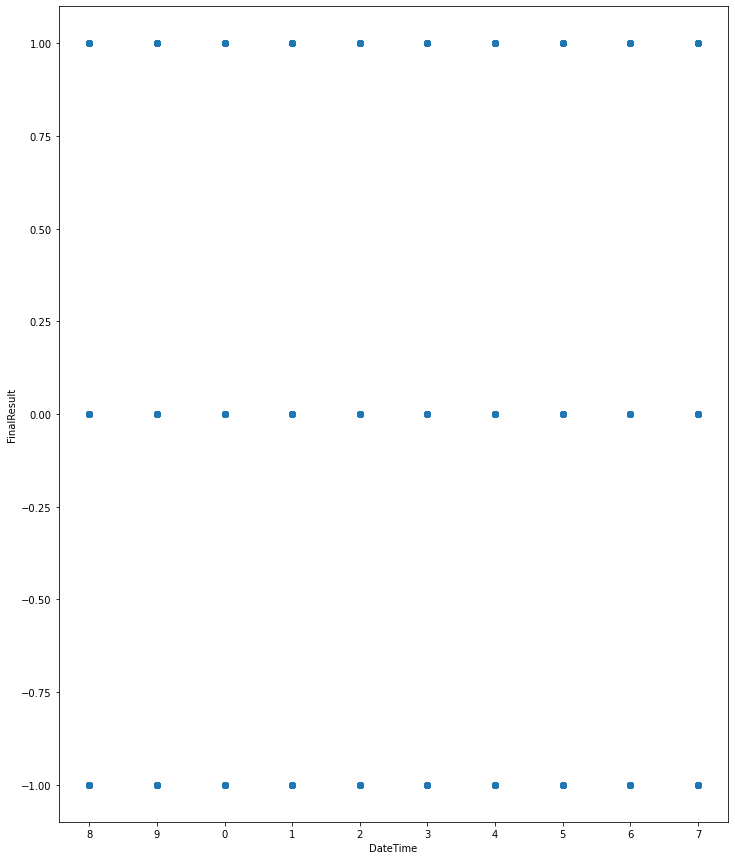

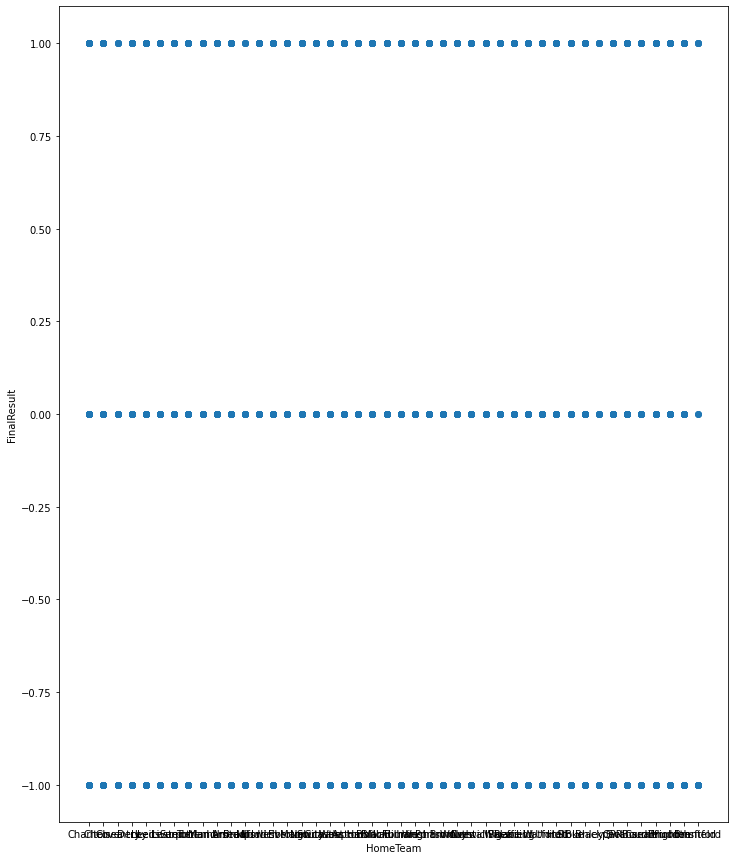

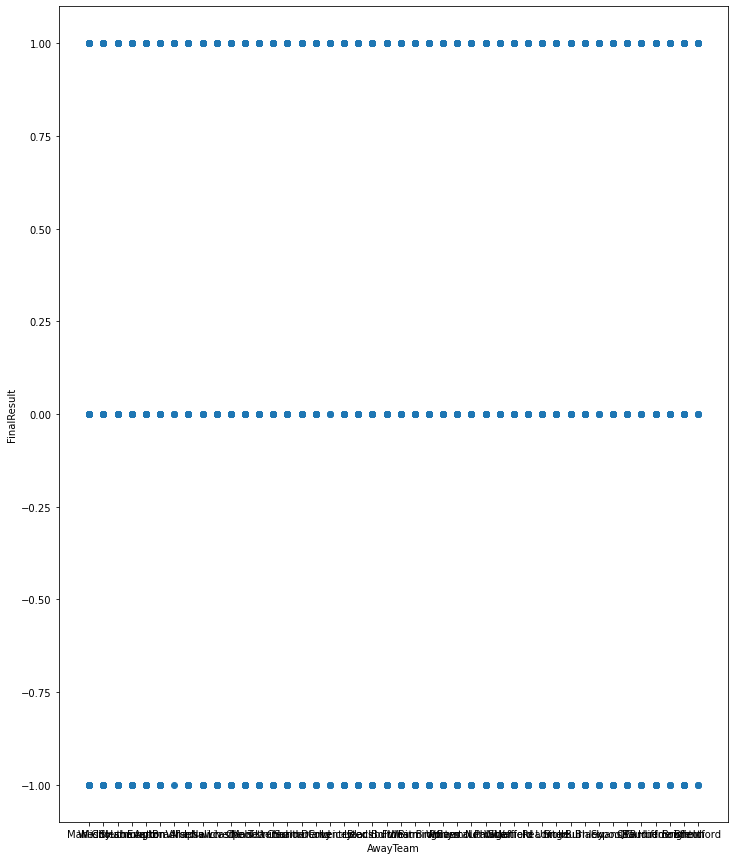

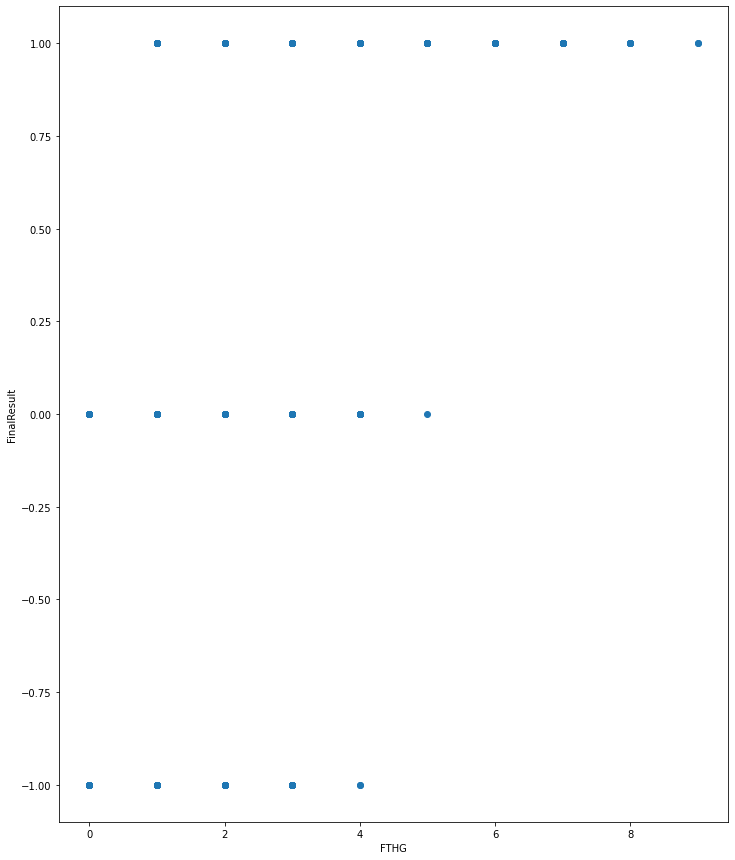

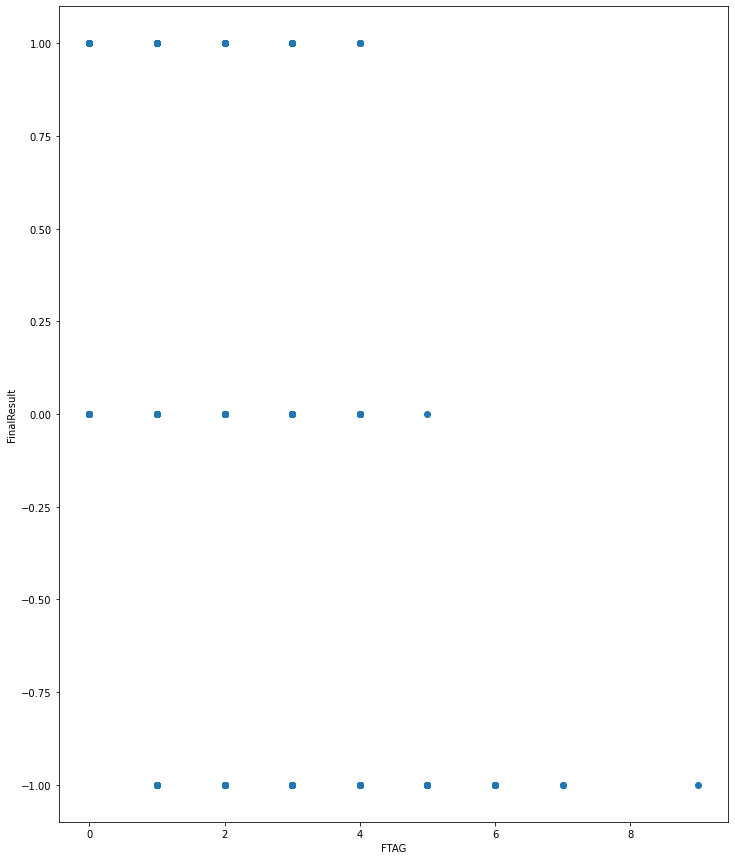

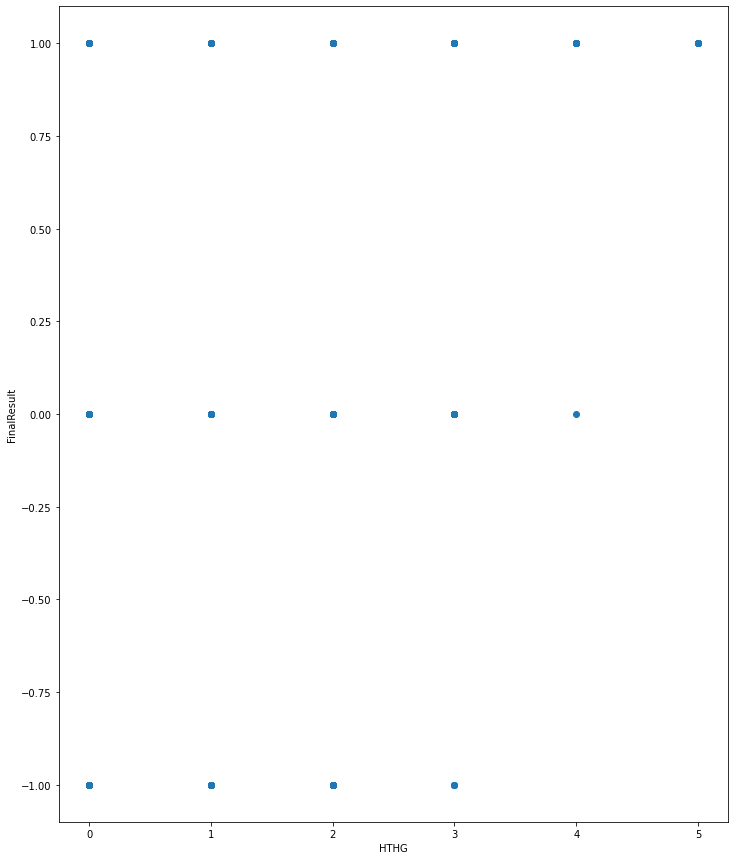

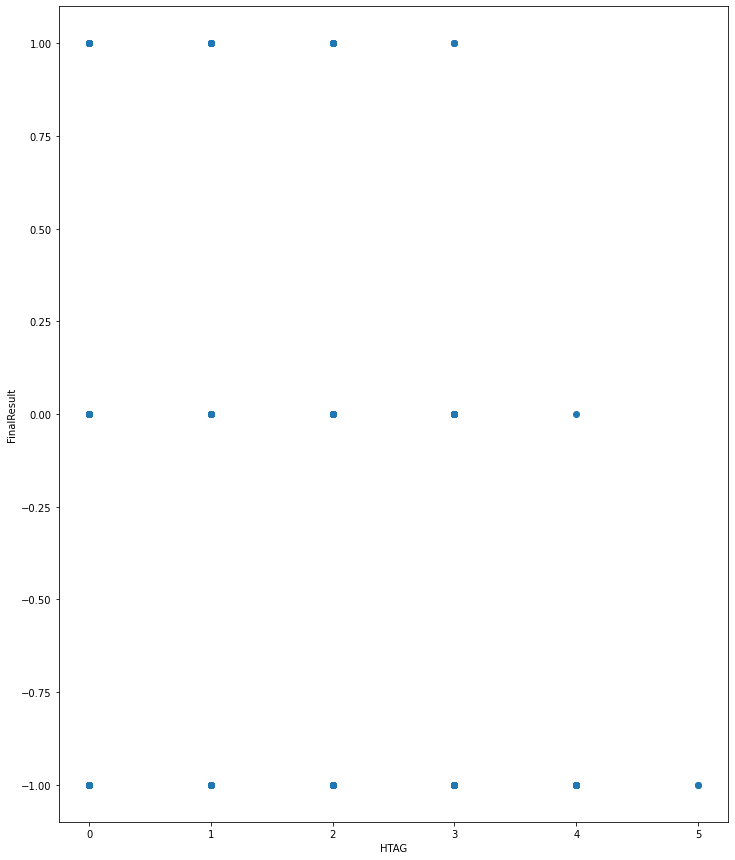

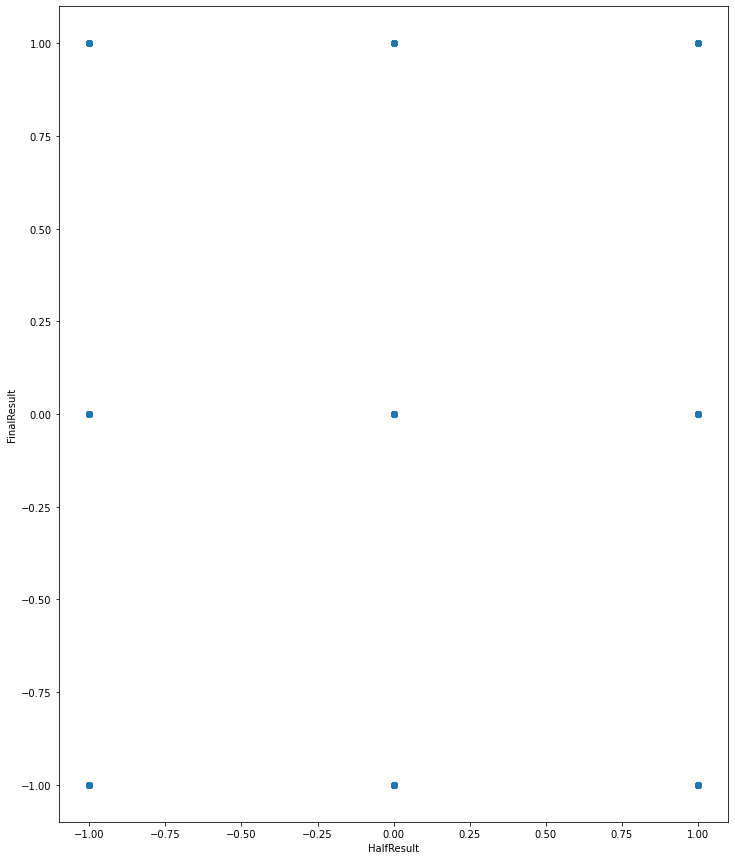

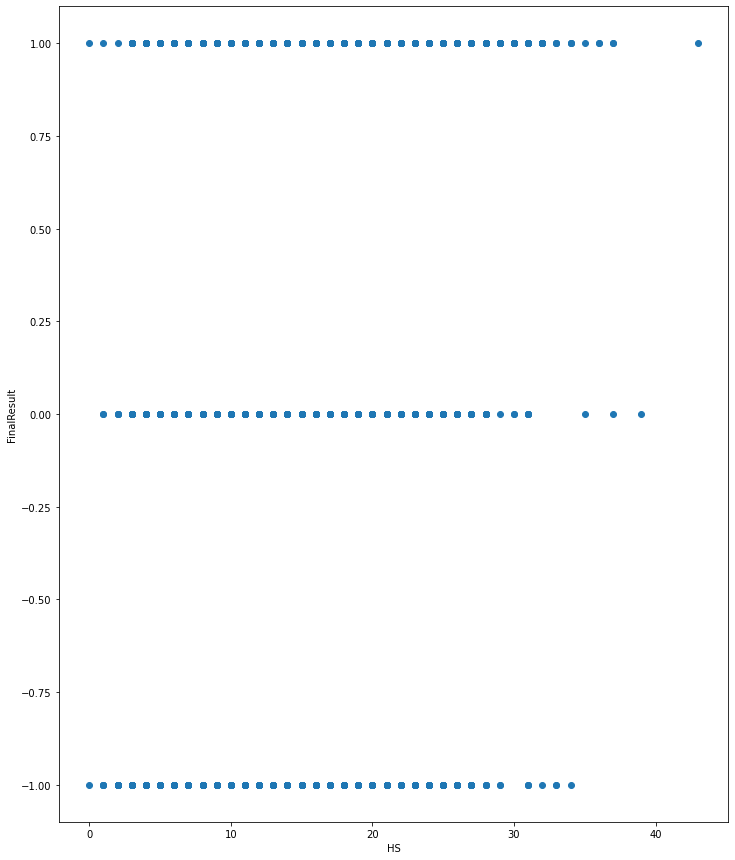

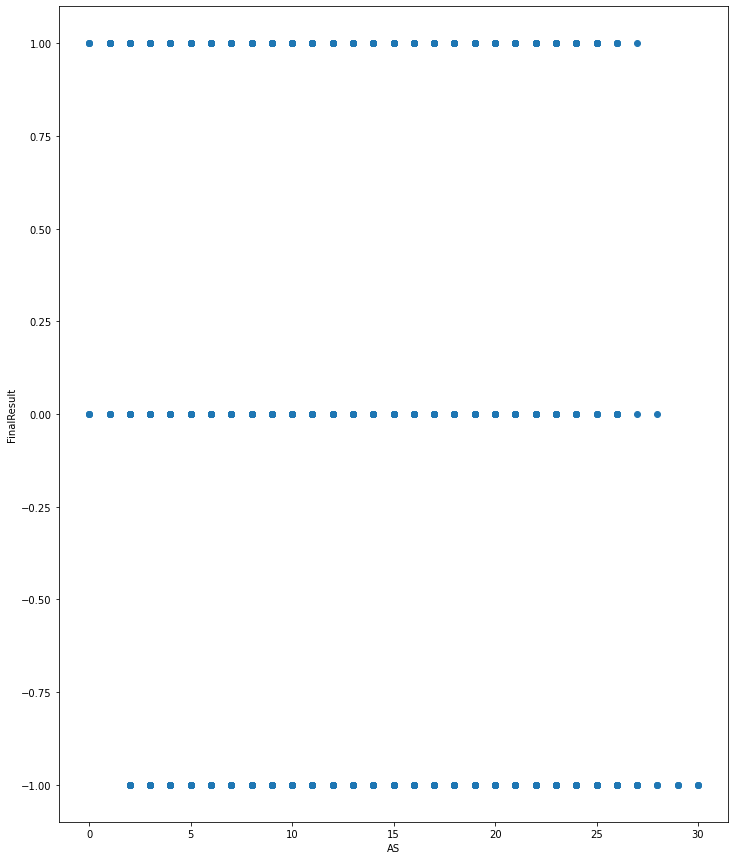

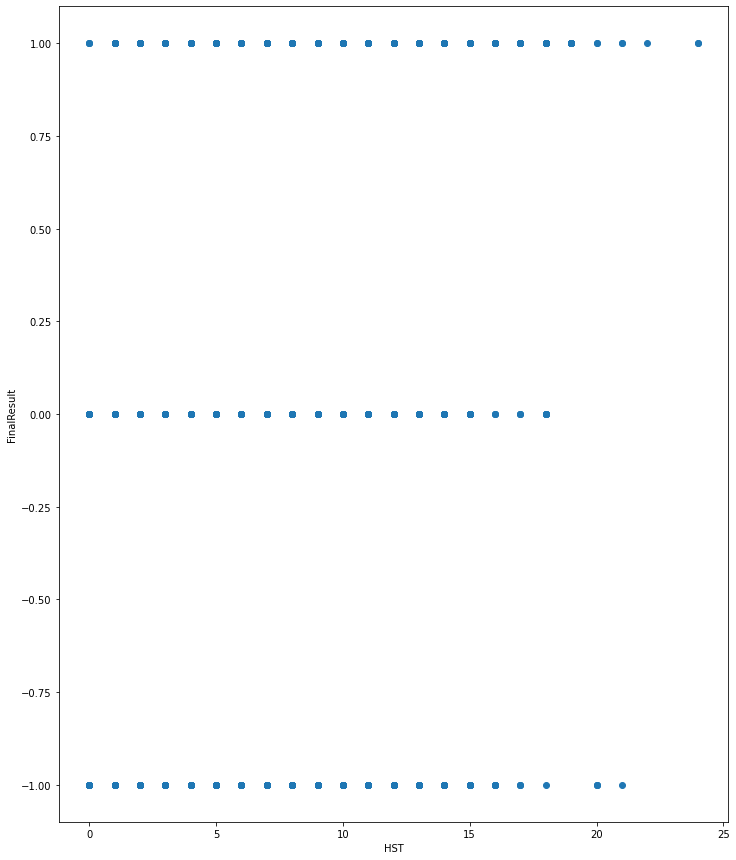

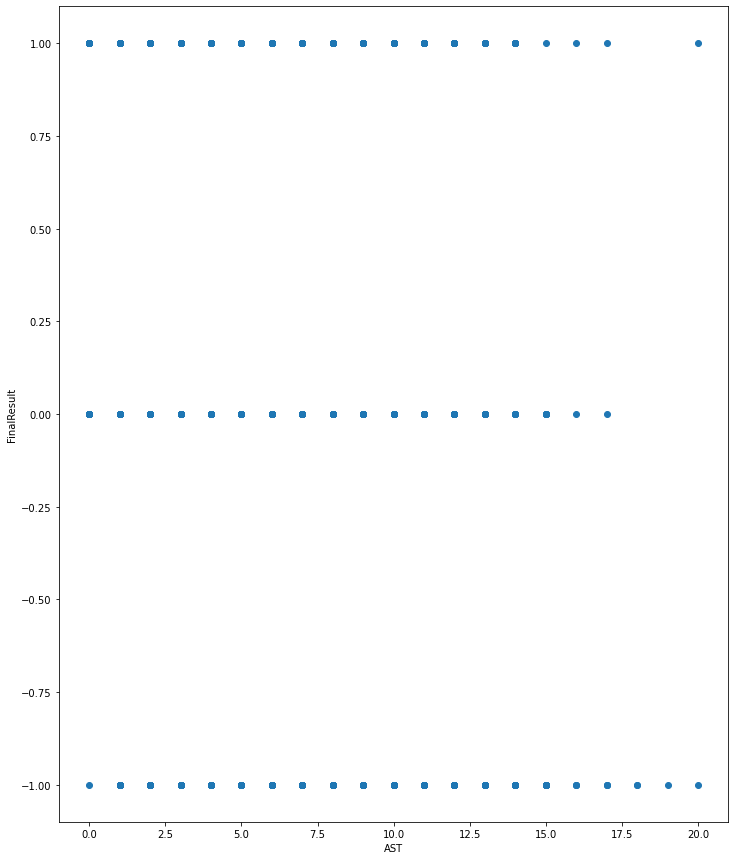

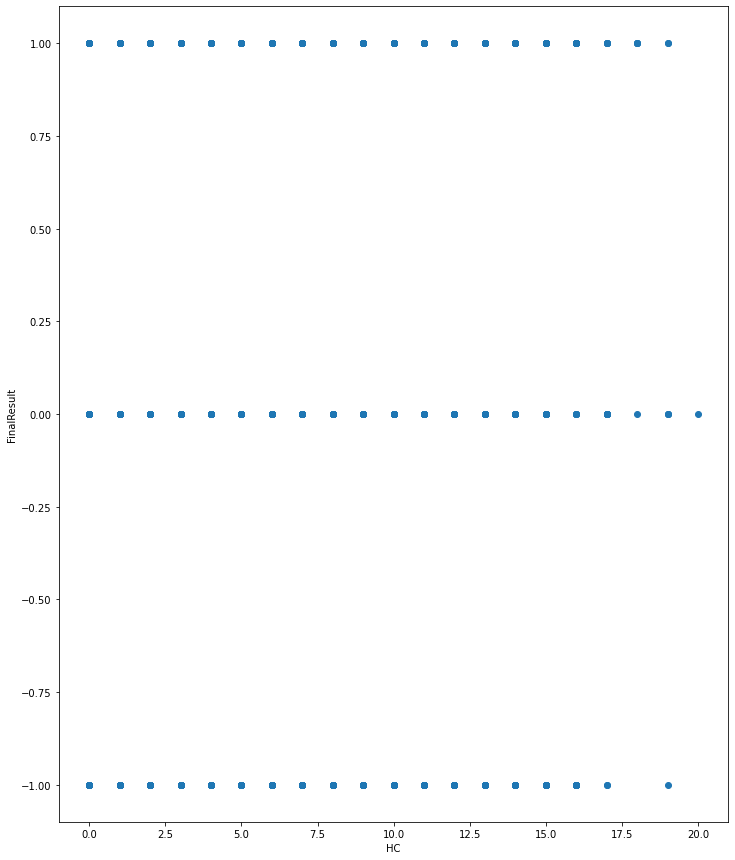

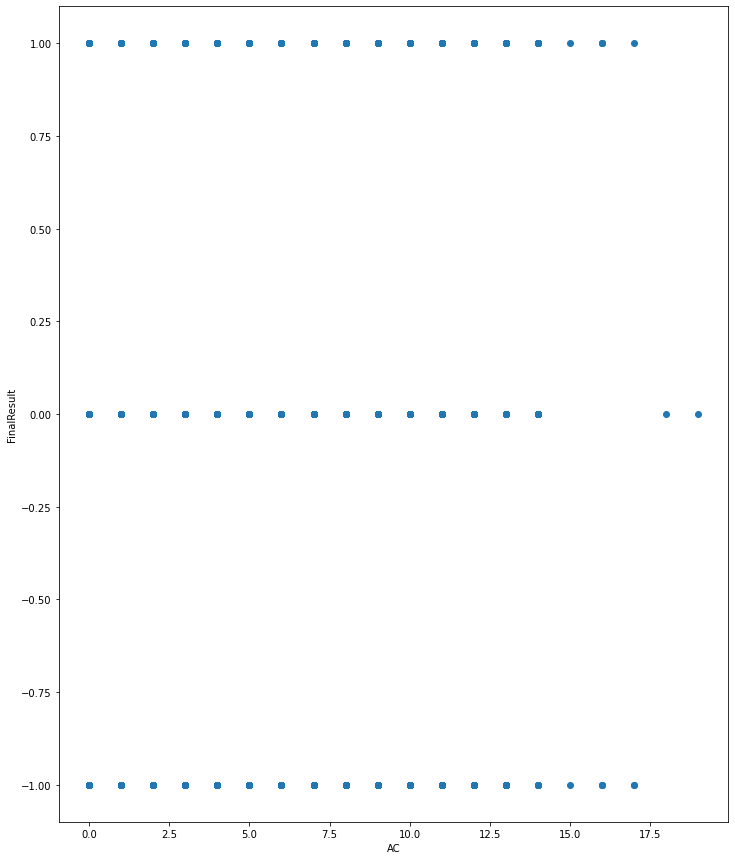

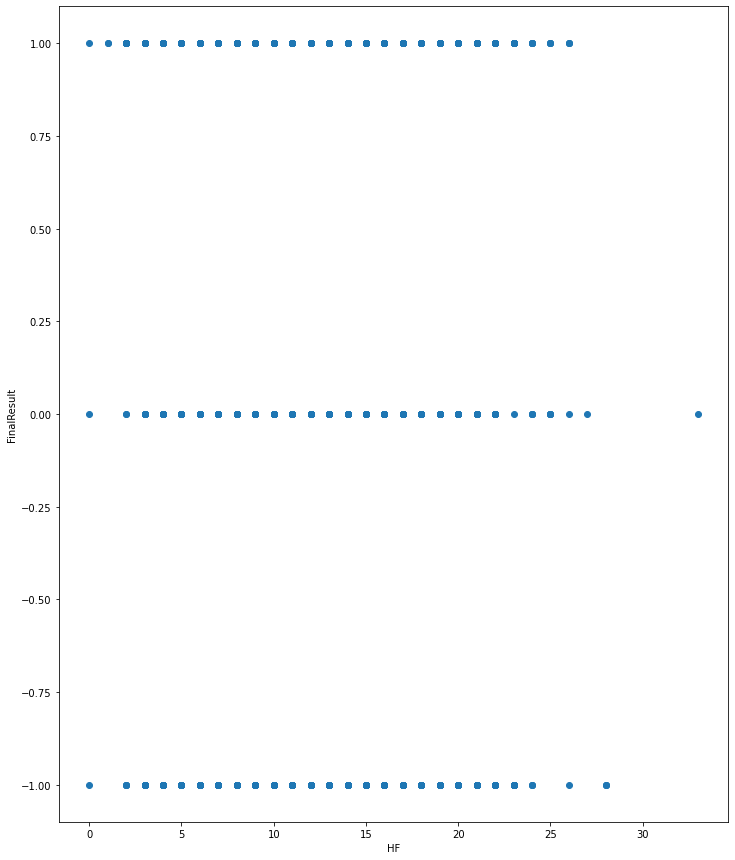

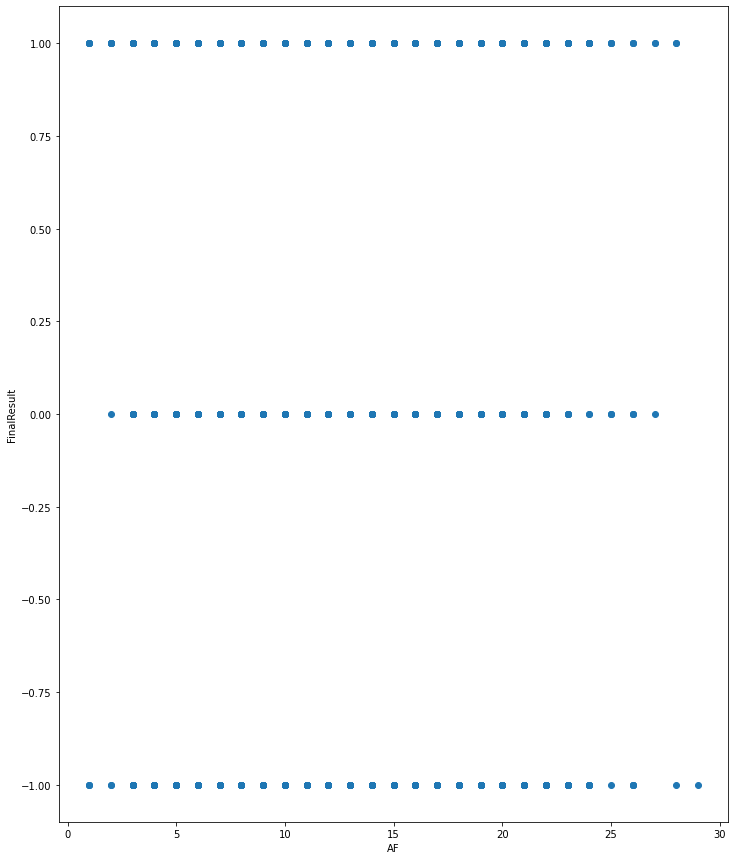

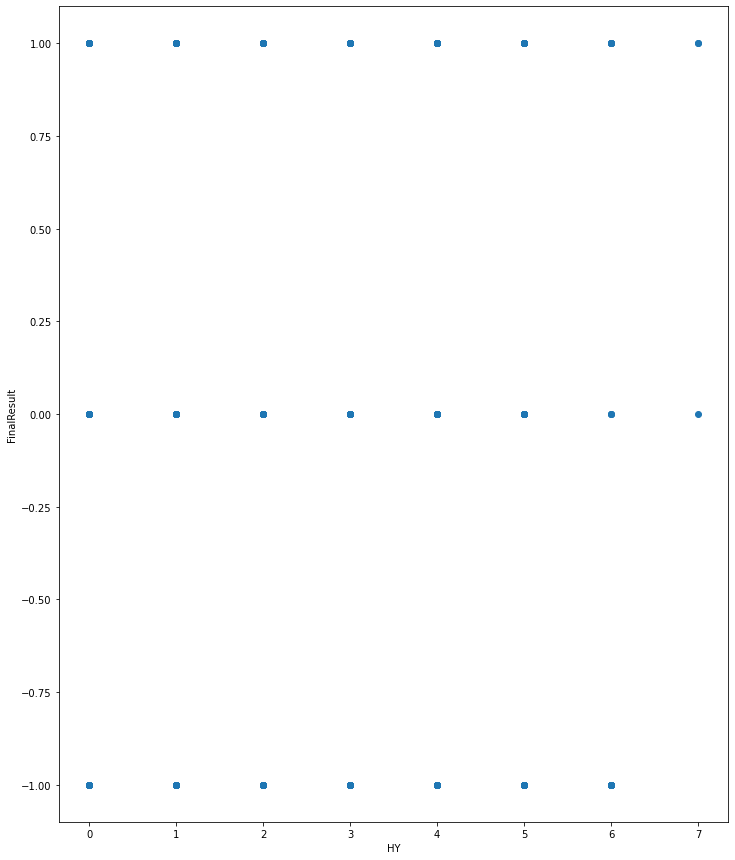

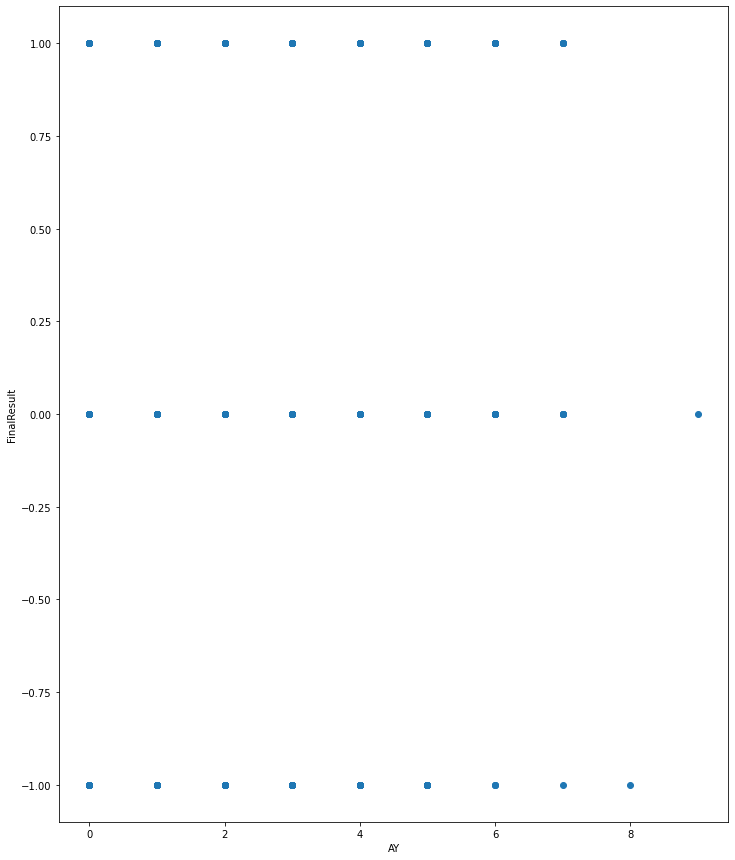

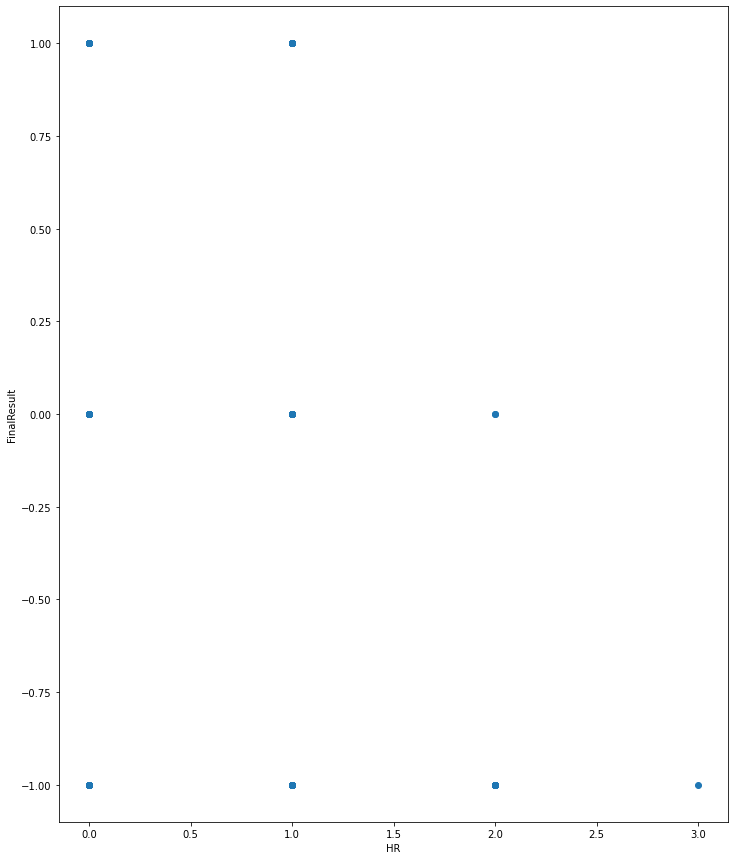

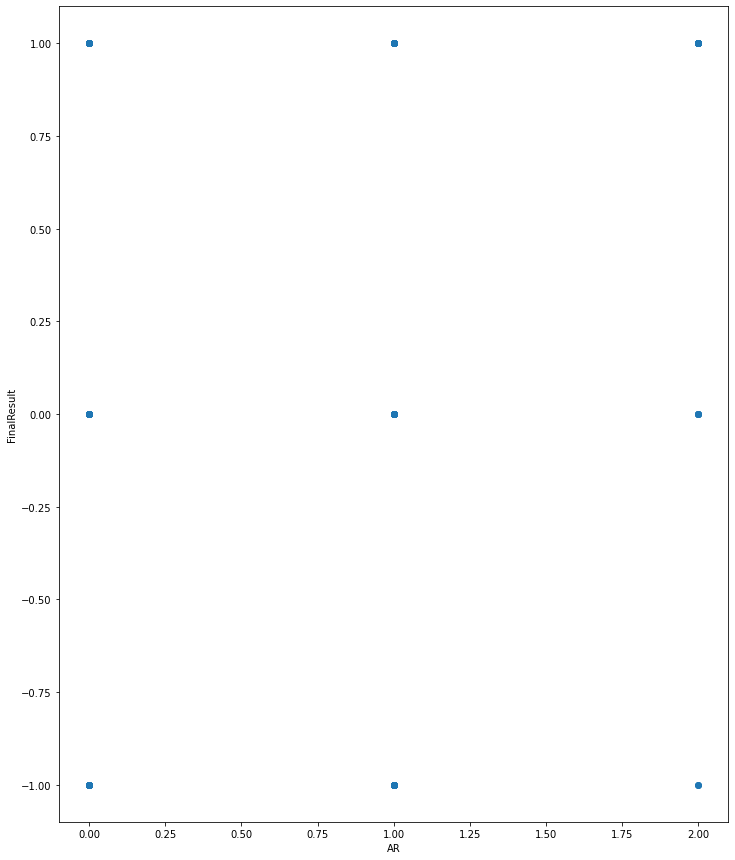

In [156]:
#Look at correlations on all of the fires

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for i in init_prem_df:
    if i != 'FinalResult' and i != 'Season' and i != 'Referee':
        plt.figure(figsize=[12, 15])
        plt.scatter(init_prem_df[i], init_prem_df['FinalResult'])
        plt.xlabel(i)
        plt.ylabel('FinalResult')